<a href="https://colab.research.google.com/github/leesy211/welcome_to_jibang/blob/main/final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [11]:
import sys

assert sys.version_info >= (3, 7)

In [12]:
import sklearn

assert sklearn.__version__ >= "1.0.1"

In [13]:
import pandas as pd
import numpy as np

pd.set_option('max_rows',500)    #출력할 max row를 지정
pd.set_option('max_columns',30)  #출력할 max columns를 지정
#출력 format 지정 - 소수점아래 4자리까지
#pd.set_option('display.float_format', '{:.4f}'.format)

#데이터 로드

In [14]:
data = pd.read_csv('/content/datafile_final.xlsx - Sheet1.csv', thousands=',')

In [15]:
data.head()

,기준연월,SGG_ID,행정구역별,전월대비방문인구증감률,코드분류,인구감소소멸지역코드,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,...,외국인관광객수_2박,외국인관광객수_3박이상,외지인관광객수_무박,외지인관광객수_1박,외지인관광객수_2박,외지인관광객수_3박이상,남녀성비,전입인구,전출인구,순이동인구,고령인구비율,혼인건수,이혼건수,주민등록인구,지가변동률
0,201802,11110,서울특별시 종로구,16.409320,0,0,5152,17226.0,1254.0,12470.0,20568.0,165.0,19912.0,55380,19551,...,7765.0560,20532.86,8694098.0,221133.5,67207,163156.0,96.2,2567,2641,-74,16.9,22,55,154509,0.454
1,201802,11140,서울특별시 중구,18.099090,0,0,3717,2947.0,NaN,15085.0,4124.0,259.0,61895.0,47963,74601,...,43167.3900,94699.98,8788525.0,201320.0,61481,123739.0,98.0,2119,1947,172,16.9,20,59,125945,0.377
2,201802,11170,서울특별시 용산구,9.176480,0,0,2115,281.0,180.0,24249.0,26391.0,349.0,7588.0,62416,23506,...,5286.1700,13942.45,6654666.0,223909.0,54831,143185.0,93.8,3583,3341,242,16.0,41,104,229770,0.837
3,201802,11200,서울특별시 성동구,12.075510,0,0,5403,166.0,51.0,3933.0,1343.0,237.0,8811.0,30598,1383,...,897.2934,3757.74,3153458.0,173572.0,60886,179357.5,97.1,4560,4361,199,13.6,36,154,305200,0.432
4,201802,11215,서울특별시 광진구,9.395173,0,0,2236,1468.0,9485.0,6390.0,1903.0,1521.0,8782.0,33852,18073,...,1534.2400,4011.50,4659967.0,233681.0,69475,211046.5,95.1,5321,5471,-150,12.3,33,174,357700,0.408


In [16]:
data.shape

(11750, 36)

In [17]:
data.columns

Index(['기준연월', 'SGG_ID', '행정구역별', '전월대비방문인구증감률', '코드분류', '인구감소소멸지역코드',
       '티맵_자연관광지_검색건수', '티맵_역사관광지_검색건수', '티맵_휴양관광지_검색건수', '티맵_공연_행사_검색건수',
       '티맵_문화시설_검색건수', '티맵_레포츠(육상해상항공)_검색건수', '티맵_쇼핑_검색건수', '티맵_식음료_검색건수',
       '티맵_숙박_검색건수', '티맵_기타관광지_검색건수', '비씨카드_내국인_소비금액', '비씨카드_외국인_소비금액',
       '비씨카드_거주민_소비금액', '외국인관광객수_무박', '외국인관광객수_1박', '외국인관광객수_2박',
       '외국인관광객수_3박이상', '외지인관광객수_무박', '외지인관광객수_1박', '외지인관광객수_2박',
       '외지인관광객수_3박이상', '남녀성비', '전입인구', '전출인구', '순이동인구', '고령인구비율', '혼인건수',
       '이혼건수', '주민등록인구', '지가변동률'],
      dtype='object')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11750 entries, 0 to 11749
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   기준연월                 11750 non-null  int64  
 1   SGG_ID               11750 non-null  int64  
 2   행정구역별                11750 non-null  object 
 3   전월대비방문인구증감률          11750 non-null  float64
 4   코드분류                 11750 non-null  int64  
 5   인구감소소멸지역코드           11750 non-null  int64  
 6   티맵_자연관광지_검색건수        11750 non-null  int64  
 7   티맵_역사관광지_검색건수        11748 non-null  float64
 8   티맵_휴양관광지_검색건수        10993 non-null  float64
 9   티맵_공연_행사_검색건수        10585 non-null  float64
 10  티맵_문화시설_검색건수         11683 non-null  float64
 11  티맵_레포츠(육상해상항공)_검색건수  11749 non-null  float64
 12  티맵_쇼핑_검색건수           11745 non-null  float64
 13  티맵_식음료_검색건수          11750 non-null  int64  
 14  티맵_숙박_검색건수           11750 non-null  int64  
 15  티맵_기타관광지_검색건수        11750 non-null 

# 결측치 확인

In [19]:
#결측치 존재하는 컬럼(11개)
#['티맵_역사관광지_검색건수' 2, '티맵_휴양관광지_검색건수 757',
# '티맵_공연_행사_검색건수' 1165', '티맵_문화시설_검색건수' 67', '티맵_레포츠(육상해상항공)_검색건수' 1,
# '티맵_쇼핑_검색건수' 5', 비씨카드_외국인_소비금액          4535
# 외국인관광객수_무박               15, 외국인관광객수_1박               15,
#외국인관광객수_2박               15, 외국인관광객수_3박이상             15]
data.isna().sum()

기준연월                      0
SGG_ID                    0
행정구역별                     0
전월대비방문인구증감률               0
코드분류                      0
인구감소소멸지역코드                0
티맵_자연관광지_검색건수             0
티맵_역사관광지_검색건수             2
티맵_휴양관광지_검색건수           757
티맵_공연_행사_검색건수          1165
티맵_문화시설_검색건수             67
티맵_레포츠(육상해상항공)_검색건수       1
티맵_쇼핑_검색건수                5
티맵_식음료_검색건수               0
티맵_숙박_검색건수                0
티맵_기타관광지_검색건수             0
비씨카드_내국인_소비금액             0
비씨카드_외국인_소비금액          4535
비씨카드_거주민_소비금액             0
외국인관광객수_무박               15
외국인관광객수_1박               15
외국인관광객수_2박               15
외국인관광객수_3박이상             15
외지인관광객수_무박                0
외지인관광객수_1박                0
외지인관광객수_2박                0
외지인관광객수_3박이상              0
남녀성비                      0
전입인구                      0
전출인구                      0
순이동인구                     0
고령인구비율                    0
혼인건수                      0
이혼건수                      0
주민등록인구                    0
지가변동률               

###티맵_역사관광지_검색건수 결측치 처리

In [20]:
data.loc[data['티맵_역사관광지_검색건수'].isna()]

,기준연월,SGG_ID,행정구역별,전월대비방문인구증감률,코드분류,인구감소소멸지역코드,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,...,외국인관광객수_2박,외국인관광객수_3박이상,외지인관광객수_무박,외지인관광객수_1박,외지인관광객수_2박,외지인관광객수_3박이상,남녀성비,전입인구,전출인구,순이동인구,고령인구비율,혼인건수,이혼건수,주민등록인구,지가변동률
225,201802,47940,울릉군,18.74427,2,2,30,NaN,0.0,NaN,3.0,0.0,NaN,0,4,...,0.000000,7.830531,16747.5,1641.5,1316,13692.0,119.6,174,176,-2,22.6,3,6,9914,0.207
2975,201901,47940,울릉군,19.98518,2,2,73,NaN,0.0,NaN,3.0,3.0,NaN,0,5,...,1.932041,9.660207,28486.5,3482.5,2268,7938.0,118.7,142,213,-71,23.4,3,4,9752,0.466


In [21]:
#티맵_역사관광지_검색건수 결측치 제거 - 울릉군
import re
data['SGG_ID'] = data['SGG_ID'].astype('str')

tmap_gyeongb1 = data.loc[data['SGG_ID'].str.contains('^47.*')]['티맵_역사관광지_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^47.*'),['티맵_역사관광지_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^47.*')]['티맵_역사관광지_검색건수'].fillna(tmap_gyeongb1)
                                                          

In [22]:
data['티맵_역사관광지_검색건수'].isna().sum()

0

###티맵_휴양관광지_검색건수 결측치 처리

In [23]:
data.loc[data['티맵_휴양관광지_검색건수'].isna()]

,기준연월,SGG_ID,행정구역별,전월대비방문인구증감률,코드분류,인구감소소멸지역코드,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,...,외국인관광객수_2박,외국인관광객수_3박이상,외지인관광객수_무박,외지인관광객수_1박,외지인관광객수_2박,외지인관광객수_3박이상,남녀성비,전입인구,전출인구,순이동인구,고령인구비율,혼인건수,이혼건수,주민등록인구,지가변동률
1,201802,11140,서울특별시 중구,18.099090,0,0,3717,2947.0,NaN,15085.0,4124.0,259.0,61895.0,47963,74601,...,43167.390000,94699.980000,8788525.0,201320.0,61481,123739.0,98.0,2119,1947,172,16.9,20,59,125945,0.377
12,201802,11410,서울특별시 서대문구,14.057340,0,0,1028,2760.0,NaN,3230.0,6087.0,248.0,3816.0,23737,7817,...,8529.936000,17368.970000,4725945.0,245868.0,82593,228154.5,93.4,5056,5032,24,15.7,36,110,312625,0.397
14,201802,11470,서울특별시 양천구,11.029140,0,0,4469,555.0,NaN,2830.0,1297.0,3897.0,2632.0,32895,453,...,493.696700,1623.215000,2430887.0,144126.5,59892,178020.5,97.4,5706,6150,-444,11.8,51,145,470290,0.326
17,201802,11545,서울특별시 금천구,13.255270,0,0,1598,658.0,NaN,1343.0,78.0,280.0,35950.0,10385,4528,...,1498.031000,4382.930000,1950480.0,111188.0,39249,103509.0,103.4,2548,2984,-436,14.5,41,82,234636,0.300
19,201802,11590,서울특별시 동작구,13.422340,0,0,3578,814.0,NaN,1491.0,585.0,67.0,28243.0,16811,2602,...,815.747400,4221.757000,3634988.0,185888.5,75019,243568.5,95.1,6138,6829,-691,14.5,50,156,394899,0.706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11659,202112,44760,부여군,7.492820,2,2,1541,6272.0,NaN,102.0,2071.0,3852.0,9272.0,12648,7973,...,6.918856,63.422840,592679.5,50022.0,23730,42028.0,98.4,498,516,-18,36.4,9,13,63774,0.188
11699,202112,46890,완도군,-1.303110,3,2,17977,512.0,NaN,36.0,277.0,497.0,935.0,3476,3095,...,10.882380,20.987440,321212.5,42899.5,21497,43827.0,101.3,262,355,-93,33.8,11,17,48631,0.166
11700,202112,46900,진도군,-0.400740,3,2,5425,1899.0,NaN,254.0,280.0,599.0,1066.0,6512,14028,...,18.578520,22.294220,302662.5,36858.5,20335,29333.5,98.4,279,283,-4,34.6,9,9,30066,0.191
11716,202112,47760,영양군,13.633210,2,2,533,399.0,NaN,7.0,72.0,25.0,82.0,471,245,...,0.000000,3.763333,81301.5,9397.5,4844,11102.0,99.6,116,104,12,38.7,3,5,16320,0.053


In [24]:
#티맵_휴양관광지_검색건수 : 서울 결측치 처리
tmap_seoul2 = data.loc[data['행정구역별'].str.contains('서울')]['티맵_휴양관광지_검색건수'].mean()
data.loc[data['행정구역별'].str.contains('서울'),['티맵_휴양관광지_검색건수']] = \
                                                                  data.loc[data['행정구역별'].str.contains('서울')]['티맵_휴양관광지_검색건수'].fillna(tmap_seoul2)

In [25]:
#티맵_휴양관광지_검색건수 : 부산 결측치 처리
tmap_pusan2 = data.loc[data['행정구역별'].str.contains('부산')]['티맵_휴양관광지_검색건수'].mean()
data.loc[data['행정구역별'].str.contains('부산'),['티맵_휴양관광지_검색건수']] = \
                                                                  data.loc[data['행정구역별'].str.contains('부산')]['티맵_휴양관광지_검색건수'].fillna(tmap_pusan2)

In [26]:
#티맵_휴양관광지_검색건수 : 인천 결측치 처리
tmap_incheon2 = data.loc[data['행정구역별'].str.contains('인천')]['티맵_휴양관광지_검색건수'].mean()
data.loc[data['행정구역별'].str.contains('인천'),['티맵_휴양관광지_검색건수']] = \
                                                                  data.loc[data['행정구역별'].str.contains('인천')]['티맵_휴양관광지_검색건수'].fillna(tmap_incheon2)

In [27]:
#티맵_휴양관광지_검색건수 : 광주 결측치 처리
tmap_gwangju2 = data.loc[data['행정구역별'].str.contains('광주')]['티맵_휴양관광지_검색건수'].mean()
data.loc[data['행정구역별'].str.contains('광주'),['티맵_휴양관광지_검색건수']] = \
                                                                  data.loc[data['행정구역별'].str.contains('광주')]['티맵_휴양관광지_검색건수'].fillna(tmap_gwangju2)

In [28]:
#티맵_휴양관광지_검색건수 : 대전 결측치 처리
tmap_daejeon2 = data.loc[data['행정구역별'].str.contains('대전')]['티맵_휴양관광지_검색건수'].mean()
data.loc[data['행정구역별'].str.contains('대전'),['티맵_휴양관광지_검색건수']] = \
                                                                  data.loc[data['행정구역별'].str.contains('대전')]['티맵_휴양관광지_검색건수'].fillna(tmap_daejeon2)

In [29]:
#티맵_휴양관광지_검색건수 : 경기지역 지자체 결측치 - 경기도 평균 대체

tmap_gyeonggi2 = data.loc[data['SGG_ID'].str.contains('^41.*')]['티맵_휴양관광지_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^41.*'),['티맵_휴양관광지_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^41.*')]['티맵_휴양관광지_검색건수'].fillna(tmap_gyeonggi2)

In [30]:
#티맵_휴양관광지_검색건수 : 강원지역 지자체 결측치 - 강원도 평균 대체

tmap_kang2 = data.loc[data['SGG_ID'].str.contains('^42.*')]['티맵_휴양관광지_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^42.*'),['티맵_휴양관광지_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^42.*')]['티맵_휴양관광지_검색건수'].fillna(tmap_kang2)

In [31]:
#티맵_휴양관광지_검색건수 : 충북지역 지자체 결측치 - 충청북도 평균 대체
tmap_chungb2 = data.loc[data['SGG_ID'].str.contains('^43.*')]['티맵_휴양관광지_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^43.*'),['티맵_휴양관광지_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^43.*')]['티맵_휴양관광지_검색건수'].fillna(tmap_chungb2)

In [32]:
#티맵_휴양관광지_검색건수 : 충남지역 지자체 결측치 - 충청남도 평균 대체
tmap_chungn2 = data.loc[data['SGG_ID'].str.contains('^44.*')]['티맵_휴양관광지_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^44.*'),['티맵_휴양관광지_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^44.*')]['티맵_휴양관광지_검색건수'].fillna(tmap_chungn2)

In [33]:
#티맵_휴양관광지_검색건수 : 전남지역 지자체 결측치 - 전라남도 평균 대체
tmap_jeonn2 = data.loc[data['SGG_ID'].str.contains('^46.*')]['티맵_휴양관광지_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^46.*'),['티맵_휴양관광지_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^46.*')]['티맵_휴양관광지_검색건수'].fillna(tmap_jeonn2)

In [34]:
#티맵_휴양관광지_검색건수 : 경북지역 지자체 결측치 - 경상북도 평균 대체
tmap_gyeongb2 = data.loc[data['SGG_ID'].str.contains('^47.*')]['티맵_휴양관광지_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^47.*'),['티맵_휴양관광지_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^47.*')]['티맵_휴양관광지_검색건수'].fillna(tmap_gyeongb2)

In [35]:
#티맵_휴양관광지_검색건수 : 경남지역 지자체 결측치 - 경상남도 평균 대체
tmap_gyeongn2 = data.loc[data['SGG_ID'].str.contains('^48.*')]['티맵_휴양관광지_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^48.*'),['티맵_휴양관광지_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^48.*')]['티맵_휴양관광지_검색건수'].fillna(tmap_gyeongn2)

In [36]:
data['티맵_휴양관광지_검색건수'].isna().sum()

0

###티맵_공연_행사_검색건수 결측치처리

In [37]:
data.loc[data['티맵_공연_행사_검색건수'].isna()]

,기준연월,SGG_ID,행정구역별,전월대비방문인구증감률,코드분류,인구감소소멸지역코드,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,...,외국인관광객수_2박,외국인관광객수_3박이상,외지인관광객수_무박,외지인관광객수_1박,외지인관광객수_2박,외지인관광객수_3박이상,남녀성비,전입인구,전출인구,순이동인구,고령인구비율,혼인건수,이혼건수,주민등록인구,지가변동률
26,201802,26140,부산광역시 서구,3.995415,2,2,6852,309.0,3.000000,NaN,135.0,125.0,1612.0,4043,971,...,383.445700,742.545600,1281375.0,78844.5,35252,79450.0,95.8,1756,1493,263,22.3,21,34,109983,0.426
28,201802,26200,부산광역시 영도구,2.872073,2,2,685,6899.0,311.000000,NaN,2632.0,239.0,952.0,6647,471,...,323.771200,659.315800,1009635.0,67739.0,34160,70311.5,98.0,1044,1202,-158,23.2,22,29,123114,0.281
36,201802,26440,부산광역시 강서구,9.307078,0,0,7401,241.0,4.000000,NaN,153.0,3589.0,752.0,16759,1474,...,234.611300,636.294200,2219630.0,64834.0,30135,72488.5,107.0,2219,1704,515,11.3,19,55,118017,0.479
48,201802,27710,대구광역시 달성군,4.357652,0,0,3814,1900.0,2276.000000,NaN,2737.0,779.0,1122.0,14608,1363,...,237.550700,1385.712000,1808604.0,118937.0,56021,135912.0,103.7,3084,2380,704,11.1,31,136,245398,0.394
68,201802,30230,대전광역시 대덕구,7.339291,2,1,1762,155.0,1898.930435,NaN,382.0,177.0,4390.0,9630,1205,...,114.788800,465.196700,1463375.0,119231.0,51751,105458.5,103.2,1792,2199,-407,12.9,37,57,186199,0.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11720,202112,47840,성주군,3.978293,2,2,1599,1047.0,217.000000,NaN,214.0,718.0,524.0,4140,3053,...,8.723660,52.341960,423521.0,32886.0,11193,22683.5,107.7,474,350,124,33.6,7,10,42842,0.163
11723,202112,47920,봉화군,11.825710,2,2,1403,1320.0,6.000000,NaN,74.0,36.0,218.0,2201,1457,...,6.787220,22.624070,225879.5,18872.0,10787,19292.0,102.2,288,294,-6,38.3,3,9,30762,0.093
11725,202112,47940,울릉군,14.901020,2,2,732,8.0,55.000000,NaN,68.0,23.0,13.0,439,380,...,0.000000,2.580384,39378.5,7395.5,9744,19232.5,120.8,102,117,-15,27.0,2,1,8867,0.516
11738,202112,48720,의령군,4.829971,2,2,331,1640.0,1526.606061,NaN,527.0,2066.0,857.0,3351,1527,...,2.671569,8.014706,251023.5,17419.5,10535,16261.0,97.1,241,219,22,38.4,3,5,26322,0.153


In [38]:
#티맵_공연_행사_검색건수 : 부산 결측치 처리

tmap_pusan3 = data.loc[data['행정구역별'].str.contains('부산')]['티맵_공연_행사_검색건수'].mean()
data.loc[data['행정구역별'].str.contains('부산'),['티맵_공연_행사_검색건수']] = \
                                                                  data.loc[data['행정구역별'].str.contains('부산')]['티맵_공연_행사_검색건수'].fillna(tmap_pusan3)

In [39]:
#티맵_공연_행사_검색건수 : 인천 결측치 처리

tmap_incheon3 = data.loc[data['행정구역별'].str.contains('인천')]['티맵_공연_행사_검색건수'].mean()
data.loc[data['행정구역별'].str.contains('인천'),['티맵_공연_행사_검색건수']] = \
                                                                  data.loc[data['행정구역별'].str.contains('인천')]['티맵_공연_행사_검색건수'].fillna(tmap_incheon3)

In [40]:
#티맵_공연_행사_검색건수 : 대구 결측치 처리

tmap_daegu3 = data.loc[data['행정구역별'].str.contains('대구')]['티맵_공연_행사_검색건수'].mean()
data.loc[data['행정구역별'].str.contains('대구'),['티맵_공연_행사_검색건수']] = \
                                                                  data.loc[data['행정구역별'].str.contains('대구')]['티맵_공연_행사_검색건수'].fillna(tmap_daegu3)

In [41]:
#티맵_공연_행사_검색건수 : 대전 결측치 처리

tmap_daejeon3 = data.loc[data['행정구역별'].str.contains('대전')]['티맵_공연_행사_검색건수'].mean()
data.loc[data['행정구역별'].str.contains('대전'),['티맵_공연_행사_검색건수']] = \
                                                                  data.loc[data['행정구역별'].str.contains('대전')]['티맵_공연_행사_검색건수'].fillna(tmap_daejeon3)

In [42]:
#티맵_공연_행사_검색건수 : 울산 결측치 처리

tmap_ulsan3 = data.loc[data['행정구역별'].str.contains('울산')]['티맵_공연_행사_검색건수'].mean()
data.loc[data['행정구역별'].str.contains('울산'),['티맵_공연_행사_검색건수']] = \
                                                                  data.loc[data['행정구역별'].str.contains('울산')]['티맵_공연_행사_검색건수'].fillna(tmap_ulsan3)

In [43]:
#티맵_공연_행사_검색건수 : 경기지역 지자체 결측치 - 경기도 평균 대체

tmap_gyeonggi3 = data.loc[data['SGG_ID'].str.contains('^41.*')]['티맵_공연_행사_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^41.*'),['티맵_공연_행사_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^41.*')]['티맵_공연_행사_검색건수'].fillna(tmap_gyeonggi3)

In [44]:
#티맵_공연_행사_검색건수 : 강원지역 지자체 결측치 - 강원도 평균 대체

tmap_kang3 = data.loc[data['SGG_ID'].str.contains('^42.*')]['티맵_공연_행사_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^42.*'),['티맵_공연_행사_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^42.*')]['티맵_공연_행사_검색건수'].fillna(tmap_kang3)

In [45]:
#티맵_공연_행사_검색건수 : 충북지역 지자체 결측치 - 충청북도 평균 대체
tmap_chungb3 = data.loc[data['SGG_ID'].str.contains('^43.*')]['티맵_공연_행사_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^43.*'),['티맵_공연_행사_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^43.*')]['티맵_공연_행사_검색건수'].fillna(tmap_chungb3)

In [46]:
#티맵_공연_행사_검색건수 : 전남지역 지자체 결측치 - 전라남도 평균 대체
tmap_jeonn3 = data.loc[data['SGG_ID'].str.contains('^46.*')]['티맵_공연_행사_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^46.*'),['티맵_공연_행사_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^46.*')]['티맵_공연_행사_검색건수'].fillna(tmap_jeonn3)

In [47]:
#티맵_공연_행사_검색건수 : 경북지역 지자체 결측치 - 경상북도 평균 대체
tmap_gyeongb3 = data.loc[data['SGG_ID'].str.contains('^47.*')]['티맵_공연_행사_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^47.*'),['티맵_공연_행사_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^47.*')]['티맵_공연_행사_검색건수'].fillna(tmap_gyeongb3)

In [48]:
#티맵_공연_행사_검색건수 : 경남지역 지자체 결측치 - 경상남도 평균 대체
tmap_gyeongn3 = data.loc[data['SGG_ID'].str.contains('^48.*')]['티맵_공연_행사_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^48.*'),['티맵_공연_행사_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^48.*')]['티맵_공연_행사_검색건수'].fillna(tmap_gyeongn3)

In [49]:
data['티맵_공연_행사_검색건수'].isna().sum()

0

###티맵_문화시설_검색건수 결측치 처리

In [50]:
data.loc[data['티맵_문화시설_검색건수'].isna()]

,기준연월,SGG_ID,행정구역별,전월대비방문인구증감률,코드분류,인구감소소멸지역코드,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,...,외국인관광객수_2박,외국인관광객수_3박이상,외지인관광객수_무박,외지인관광객수_1박,외지인관광객수_2박,외지인관광객수_3박이상,남녀성비,전입인구,전출인구,순이동인구,고령인구비율,혼인건수,이혼건수,주민등록인구,지가변동률
43,201802,27170,대구광역시 서구,2.748081,2,2,242,24.0,6.000000,397.000000,NaN,43.0,4153.0,5649,1150,...,120.823500,529.32190,1614620.0,106788.5,46928,86758.0,101.7,1475,2022,-547,18.4,29,54,190736,0.361
58,201802,28720,인천광역시 옹진군,2.319038,2,2,4687,83.0,3.000000,0.000000,NaN,257.0,130.0,651,3188,...,121.542000,216.07470,130385.5,27919.5,9464,18847.5,130.6,320,448,-128,22.7,4,9,21406,0.184
293,201803,27170,대구광역시 서구,-7.939150,3,2,400,36.0,9.000000,376.000000,NaN,47.0,3914.0,6451,1315,...,116.097500,335.67320,1716852.0,75498.5,24486,71057.0,101.6,1730,2328,-598,18.5,20,67,190084,0.401
308,201803,28720,인천광역시 옹진군,-28.770200,3,2,8068,204.0,8.000000,3653.845794,NaN,1883.0,200.0,1116,4659,...,106.814800,131.94770,211547.0,37250.5,9366,31213.0,130.8,322,373,-51,22.8,6,11,21344,0.167
543,201804,27170,대구광역시 서구,6.092269,2,2,377,26.0,8.000000,452.000000,NaN,46.0,3902.0,6739,1397,...,120.323700,360.97110,1592906.0,74270.0,29939,63672.0,101.6,1718,2160,-442,18.7,37,46,189585,0.398
793,201805,27170,대구광역시 서구,-6.732400,3,2,497,50.0,12.000000,460.000000,NaN,37.0,4271.0,7552,1301,...,130.412200,198.03340,1707944.0,85071.0,30947,75505.5,101.6,1835,2320,-485,18.8,40,73,189044,0.414
1043,201806,27170,대구광역시 서구,5.277432,2,2,461,22.0,10.000000,417.000000,NaN,61.0,3941.0,7223,1261,...,84.497490,285.17900,1573138.0,74392.5,27076,64274.0,101.6,1829,2144,-315,18.8,22,56,188705,0.385
1058,201806,28720,인천광역시 옹진군,2.717795,2,2,16724,136.0,5.000000,3653.845794,NaN,3535.0,338.0,3898,12014,...,170.374900,465.48860,363881.0,94104.5,18382,28532.0,130.4,229,232,-3,23.1,4,11,21233,0.168
1293,201807,27170,대구광역시 서구,-2.512470,3,2,476,33.0,6.000000,582.000000,NaN,24.0,4197.0,7775,1496,...,188.489300,529.43310,1635144.0,77098.0,29764,73909.5,101.6,1719,2255,-536,18.9,37,74,188107,0.333
1406,201807,44250,계룡시,-2.358690,1,0,61,136.0,2056.334302,157.000000,NaN,2412.0,732.0,5394,372,...,56.684320,172.23310,319312.0,21098.0,9464,23929.5,98.3,507,610,-103,9.9,5,11,43752,0.194


In [51]:
#티맵_문화시설_검색건수 : 대구 결측치 처리

tmap_daegu4 = data.loc[data['행정구역별'].str.contains('대구')]['티맵_문화시설_검색건수'].mean()
data.loc[data['행정구역별'].str.contains('대구'),['티맵_문화시설_검색건수']] = \
                                                                  data.loc[data['행정구역별'].str.contains('대구')]['티맵_문화시설_검색건수'].fillna(tmap_daegu4)

In [52]:
#티맵_문화시설_검색건수 : 인천 결측치 처리

tmap_incheon4 = data.loc[data['행정구역별'].str.contains('인천')]['티맵_문화시설_검색건수'].mean()
data.loc[data['행정구역별'].str.contains('인천'),['티맵_문화시설_검색건수']] = \
                                                                  data.loc[data['행정구역별'].str.contains('인천')]['티맵_문화시설_검색건수'].fillna(tmap_incheon4)

In [53]:
#티맵_문화시설_검색건수 : 충남지역 지자체 결측치 - 충청남도 평균 대체
tmap_chungn4 = data.loc[data['SGG_ID'].str.contains('^44.*')]['티맵_문화시설_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^44.*'),['티맵_문화시설_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^44.*')]['티맵_문화시설_검색건수'].fillna(tmap_chungn4)

In [54]:
data['티맵_문화시설_검색건수'].isna().sum()

0

###티맵_레포츠(육상해상항공)_검색건수 결측치 처리

In [55]:
data.loc[data['티맵_레포츠(육상해상항공)_검색건수'].isna()]

,기준연월,SGG_ID,행정구역별,전월대비방문인구증감률,코드분류,인구감소소멸지역코드,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,...,외국인관광객수_2박,외국인관광객수_3박이상,외지인관광객수_무박,외지인관광객수_1박,외지인관광객수_2박,외지인관광객수_3박이상,남녀성비,전입인구,전출인구,순이동인구,고령인구비율,혼인건수,이혼건수,주민등록인구,지가변동률
8975,202101,47940,울릉군,24.82561,2,2,142,0.0,5.0,682.230866,9.0,NaN,0.0,9,23,...,1.634898,0.0,27881.0,3230.5,2100,8799.0,120.3,100,142,-36,26.5,3,3,9035,0.332


In [56]:
#티맵_레포츠(육상해상항공)_검색건수 : 경북지역 지자체 결측치 - 경상북도 평균 대체
tmap_gyeongb5 = data.loc[data['SGG_ID'].str.contains('^47.*')]['티맵_레포츠(육상해상항공)_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^47.*'),['티맵_레포츠(육상해상항공)_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^47.*')]['티맵_레포츠(육상해상항공)_검색건수'].fillna(tmap_gyeongb5)

In [57]:
data['티맵_레포츠(육상해상항공)_검색건수'].isna().sum()

0

###티맵_쇼핑_검색건수 결측치 처리

In [58]:
data.loc[data['티맵_쇼핑_검색건수'].isna()]

,기준연월,SGG_ID,행정구역별,전월대비방문인구증감률,코드분류,인구감소소멸지역코드,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,...,외국인관광객수_2박,외국인관광객수_3박이상,외지인관광객수_무박,외지인관광객수_1박,외지인관광객수_2박,외지인관광객수_3박이상,남녀성비,전입인구,전출인구,순이동인구,고령인구비율,혼인건수,이혼건수,주민등록인구,지가변동률
225,201802,47940,울릉군,18.74427,2,2,30,6314.283304,0.0,682.230866,3.0,0.0,NaN,0,4,...,0.000000,7.830531,16747.5,1641.5,1316,13692.0,119.6,174,176,-2,22.6,3,6,9914,0.207
475,201803,47940,울릉군,-42.22530,3,2,260,9.000000,17.0,682.230866,26.0,9.0,NaN,66,63,...,28.304160,33.965000,61999.0,7675.5,9464,22389.5,119.1,193,177,16,22.7,4,5,9934,0.241
2975,201901,47940,울릉군,19.98518,2,2,73,6314.283304,0.0,682.230866,3.0,3.0,NaN,0,5,...,1.932041,9.660207,28486.5,3482.5,2268,7938.0,118.7,142,213,-71,23.4,3,4,9752,0.466
3225,201902,47940,울릉군,14.76287,2,2,165,7.000000,3.0,682.230866,14.0,9.0,NaN,15,33,...,1.865070,0.000000,22613.5,3167.5,4130,18308.5,118.9,185,199,-14,23.6,4,2,9737,0.381
6225,202002,47940,울릉군,-8.34577,3,2,207,0.000000,7.0,682.230866,11.0,0.0,NaN,3,43,...,8.721805,8.721805,32067.0,2733.5,2436,21493.5,120.1,194,256,-62,24.8,5,4,9457,0.508


In [59]:
#티맵_쇼핑_검색건수 : 경북지역 지자체 결측치 - 경상북도 평균 대체
tmap_gyeongb6 = data.loc[data['SGG_ID'].str.contains('^47.*')]['티맵_쇼핑_검색건수'].mean()
data.loc[data['SGG_ID'].str.contains('^47.*'),['티맵_쇼핑_검색건수']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^47.*')]['티맵_쇼핑_검색건수'].fillna(tmap_gyeongb6)

In [60]:
data['티맵_쇼핑_검색건수'].isna().sum()

0

###비씨카드_외국인_소비금액 결측치 처리

In [61]:
data.loc[data['비씨카드_외국인_소비금액'].isna()]

,기준연월,SGG_ID,행정구역별,전월대비방문인구증감률,코드분류,인구감소소멸지역코드,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,...,외국인관광객수_2박,외국인관광객수_3박이상,외지인관광객수_무박,외지인관광객수_1박,외지인관광객수_2박,외지인관광객수_3박이상,남녀성비,전입인구,전출인구,순이동인구,고령인구비율,혼인건수,이혼건수,주민등록인구,지가변동률
43,201802,27170,대구광역시 서구,2.748081,2,2,242,24.0,6.000000,397.000000,4909.689744,43.0,4153.0,5649,1150,...,120.823500,529.32190,1614620.0,106788.5,46928,86758.0,101.7,1475,2022,-547,18.4,29,54,190736,0.361
48,201802,27710,대구광역시 달성군,4.357652,0,0,3814,1900.0,2276.000000,3317.198068,2737.000000,779.0,1122.0,14608,1363,...,237.550700,1385.71200,1808604.0,118937.0,56021,135912.0,103.7,3084,2380,704,11.1,31,136,245398,0.394
50,201802,28140,인천광역시 동구,10.453750,2,1,2112,27.0,1511.482143,74.000000,532.000000,487.0,1204.0,2404,162,...,130.351900,379.72070,578333.0,27289.5,11501,23481.5,101.7,585,1066,-481,19.3,13,17,68689,0.167
57,201802,28710,인천광역시 강화군,2.545873,2,2,21455,15181.0,8682.000000,283.000000,1480.000000,3352.0,6891.0,20449,14348,...,83.335930,83.33593,690784.5,109949.0,38794,42728.0,100.7,688,662,26,30.0,8,14,68716,0.126
58,201802,28720,인천광역시 옹진군,2.319038,2,2,4687,83.0,3.000000,0.000000,3382.074561,257.0,130.0,651,3188,...,121.542000,216.07470,130385.5,27919.5,9464,18847.5,130.6,320,448,-128,22.7,4,9,21406,0.184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11743,202112,48850,하동군,17.324100,2,2,2124,3989.0,168.000000,5.000000,345.000000,1493.0,4348.0,8118,5214,...,25.734000,73.24292,340819.5,37411.5,17941,24458.0,99.7,315,331,-16,36.3,11,5,43449,0.141
11744,202112,48860,산청군,15.016470,2,2,996,3898.0,53.000000,15.000000,310.000000,119.0,355.0,5764,5368,...,5.506124,12.84762,325612.0,39221.0,18095,22256.5,97.1,311,291,20,38.3,5,6,34360,0.180
11745,202112,48870,함양군,9.350948,2,2,2024,1327.0,83.000000,6.000000,81.000000,1342.0,535.0,3595,2659,...,8.472914,47.66014,252717.5,29491.0,15407,23898.0,93.7,319,372,-53,35.2,6,5,38310,0.157
11746,202112,48880,거창군,7.115174,2,2,1381,648.0,1106.000000,71.000000,267.000000,1987.0,964.0,6192,2722,...,6.418417,27.81314,387086.0,32763.5,16478,33127.5,96.3,411,419,-8,28.7,9,17,61073,0.168


In [62]:
#비씨카드_외국인_소비금액 : 서울 결측치 처리

tmap_seoul7 = data.loc[data['행정구역별'].str.contains('서울')]['비씨카드_외국인_소비금액'].mean()
data.loc[data['행정구역별'].str.contains('서울'),['비씨카드_외국인_소비금액']] = \
                                                                  data.loc[data['행정구역별'].str.contains('서울')]['비씨카드_외국인_소비금액'].fillna(tmap_seoul7)

In [63]:
#비씨카드_외국인_소비금액 : 부산 결측치 처리

tmap_pusan7 = data.loc[data['행정구역별'].str.contains('부산')]['비씨카드_외국인_소비금액'].mean()
data.loc[data['행정구역별'].str.contains('부산'),['비씨카드_외국인_소비금액']] = \
                                                                  data.loc[data['행정구역별'].str.contains('부산')]['비씨카드_외국인_소비금액'].fillna(tmap_pusan7)

In [64]:
#비씨카드_외국인_소비금액 : 대구 결측치 처리

tmap_daegu7 = data.loc[data['행정구역별'].str.contains('대구')]['비씨카드_외국인_소비금액'].mean()
data.loc[data['행정구역별'].str.contains('대구'),['비씨카드_외국인_소비금액']] = \
                                                                  data.loc[data['행정구역별'].str.contains('대구')]['비씨카드_외국인_소비금액'].fillna(tmap_daegu7)

In [65]:
#비씨카드_외국인_소비금액 : 인천 결측치 처리

tmap_incheon7 = data.loc[data['행정구역별'].str.contains('인천')]['비씨카드_외국인_소비금액'].mean()
data.loc[data['행정구역별'].str.contains('인천'),['비씨카드_외국인_소비금액']] = \
                                                                  data.loc[data['행정구역별'].str.contains('인천')]['비씨카드_외국인_소비금액'].fillna(tmap_incheon7)

In [66]:
#비씨카드_외국인_소비금액 : 광주 결측치 처리

tmap_gwangju7 = data.loc[data['행정구역별'].str.contains('광주')]['비씨카드_외국인_소비금액'].mean()
data.loc[data['행정구역별'].str.contains('광주'),['비씨카드_외국인_소비금액']] = \
                                                                  data.loc[data['행정구역별'].str.contains('광주')]['비씨카드_외국인_소비금액'].fillna(tmap_gwangju7)

In [67]:
#비씨카드_외국인_소비금액 : 대전 결측치 처리

tmap_daejeon7 = data.loc[data['행정구역별'].str.contains('대전')]['비씨카드_외국인_소비금액'].mean()
data.loc[data['행정구역별'].str.contains('대전'),['비씨카드_외국인_소비금액']] = \
                                                                  data.loc[data['행정구역별'].str.contains('대전')]['비씨카드_외국인_소비금액'].fillna(tmap_daejeon7)

In [68]:
#비씨카드_외국인_소비금액 : 울산 결측치 처리

tmap_ulsan7 = data.loc[data['행정구역별'].str.contains('울산')]['비씨카드_외국인_소비금액'].mean()
data.loc[data['행정구역별'].str.contains('울산'),['비씨카드_외국인_소비금액']] = \
                                                                  data.loc[data['행정구역별'].str.contains('울산')]['비씨카드_외국인_소비금액'].fillna(tmap_ulsan7)

In [69]:
#비씨카드_외국인_소비금액 : 세종 결측치 처리

tmap_sejong7 = data.loc[data['행정구역별'].str.contains('세종')]['비씨카드_외국인_소비금액'].mean()
data.loc[data['행정구역별'].str.contains('세종'),['비씨카드_외국인_소비금액']] = \
                                                                  data.loc[data['행정구역별'].str.contains('세종')]['비씨카드_외국인_소비금액'].fillna(tmap_sejong7)

In [70]:
#비씨카드_외국인_소비금액 : 경기지역 지자체 결측치 - 경기도 평균 대체

tmap_gyeonggi7 = data.loc[data['SGG_ID'].str.contains('^41.*')]['비씨카드_외국인_소비금액'].mean()
data.loc[data['SGG_ID'].str.contains('^41.*'),['비씨카드_외국인_소비금액']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^41.*')]['비씨카드_외국인_소비금액'].fillna(tmap_gyeonggi7)

In [71]:
#비씨카드_외국인_소비금액 : 강원지역 지자체 결측치 - 강원도 평균 대체

tmap_kang7 = data.loc[data['SGG_ID'].str.contains('^42.*')]['비씨카드_외국인_소비금액'].mean()
data.loc[data['SGG_ID'].str.contains('^42.*'),['비씨카드_외국인_소비금액']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^42.*')]['비씨카드_외국인_소비금액'].fillna(tmap_kang7)

In [72]:
#비씨카드_외국인_소비금액 : 충북지역 지자체 결측치 - 충청북도 평균 대체
tmap_chungb7 = data.loc[data['SGG_ID'].str.contains('^43.*')]['비씨카드_외국인_소비금액'].mean()
data.loc[data['SGG_ID'].str.contains('^43.*'),['비씨카드_외국인_소비금액']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^43.*')]['비씨카드_외국인_소비금액'].fillna(tmap_chungb7)

In [73]:
#비씨카드_외국인_소비금액 : 충남지역 지자체 결측치 - 충청남도 평균 대체
tmap_chungn7 = data.loc[data['SGG_ID'].str.contains('^44.*')]['비씨카드_외국인_소비금액'].mean()
data.loc[data['SGG_ID'].str.contains('^44.*'),['비씨카드_외국인_소비금액']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^44.*')]['비씨카드_외국인_소비금액'].fillna(tmap_chungn7)

In [74]:
#비씨카드_외국인_소비금액 : 전북지역 지자체 결측치 - 전라북도 평균 대체
tmap_jeonb7 = data.loc[data['SGG_ID'].str.contains('^45.*')]['비씨카드_외국인_소비금액'].mean()
data.loc[data['SGG_ID'].str.contains('^45.*'),['비씨카드_외국인_소비금액']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^45.*')]['비씨카드_외국인_소비금액'].fillna(tmap_jeonb7)

In [75]:
#비씨카드_외국인_소비금액 : 전남지역 지자체 결측치 - 전라남도 평균 대체
tmap_jeonn7 = data.loc[data['SGG_ID'].str.contains('^46.*')]['비씨카드_외국인_소비금액'].mean()
data.loc[data['SGG_ID'].str.contains('^46.*'),['비씨카드_외국인_소비금액']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^46.*')]['비씨카드_외국인_소비금액'].fillna(tmap_jeonn7)

In [76]:
#비씨카드_외국인_소비금액 : 경북지역 지자체 결측치 - 경상북도 평균 대체
tmap_gyeongb7 = data.loc[data['SGG_ID'].str.contains('^47.*')]['비씨카드_외국인_소비금액'].mean()
data.loc[data['SGG_ID'].str.contains('^47.*'),['비씨카드_외국인_소비금액']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^47.*')]['비씨카드_외국인_소비금액'].fillna(tmap_gyeongb7)

In [77]:
#비씨카드_외국인_소비금액 : 경남지역 지자체 결측치 - 경상남도 평균 대체
tmap_gyeongn7 = data.loc[data['SGG_ID'].str.contains('^48.*')]['비씨카드_외국인_소비금액'].mean()
data.loc[data['SGG_ID'].str.contains('^48.*'),['비씨카드_외국인_소비금액']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^48.*')]['비씨카드_외국인_소비금액'].fillna(tmap_gyeongn7)

In [78]:
data['비씨카드_외국인_소비금액'].isna().sum()

0

###외국인관광객수_무박 결측치 처리

In [79]:
data.loc[data['외국인관광객수_무박'].isna()]

,기준연월,SGG_ID,행정구역별,전월대비방문인구증감률,코드분류,인구감소소멸지역코드,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,...,외국인관광객수_2박,외국인관광객수_3박이상,외지인관광객수_무박,외지인관광객수_1박,외지인관광객수_2박,외지인관광객수_3박이상,남녀성비,전입인구,전출인구,순이동인구,고령인구비율,혼인건수,이혼건수,주민등록인구,지가변동률
8425,202011,45740,장수군,14.566480,2,2,1128,523.0,450.000000,6.000000,87.0,1322.0,150.0,1458,743,...,NaN,NaN,151387.6,18385.5,10941,13870.5,99.2,150,182,-32,34.1,3,6,22099,0.178
8631,202012,42800,양구군,1.880342,2,2,641,146.0,57.000000,18.000000,334.0,165.0,228.0,1717,777,...,NaN,NaN,153825.0,9891.0,6104,16943.5,113.2,233,305,-72,21.1,9,9,22278,0.115
8925,202101,45740,장수군,11.366380,2,2,816,293.0,58.000000,10.000000,45.0,312.0,110.0,745,318,...,NaN,NaN,123053.0,8431.5,4081,10391.5,99.3,185,171,8,34.3,3,2,22081,0.189
9131,202102,42800,양구군,-1.750840,3,2,1236,153.0,154.000000,13.000000,543.0,212.0,257.0,3010,1520,...,NaN,NaN,125912.5,13688.5,10346,20989.5,113.2,323,249,-38,21.4,2,9,22123,0.109
9132,202102,42810,인제군,-7.286030,3,1,11249,2943.0,449.000000,3.000000,272.0,3183.0,564.0,11550,5969,...,NaN,NaN,438592.0,32277.0,21966,35402.5,117.0,399,380,-56,20.9,4,9,31665,0.114
9175,202102,45740,장수군,-10.815100,3,2,823,542.0,146.000000,17.000000,70.0,614.0,117.0,903,423,...,NaN,NaN,154511.0,16513.0,11627,17766.0,99.4,133,191,-27,34.5,5,4,22035,0.188
9178,202102,45790,고창군,-9.284570,3,2,7501,7338.0,1028.000000,21.000000,638.0,3729.0,883.0,9953,3787,...,NaN,NaN,551162.5,50207.5,31962,48776.0,97.9,463,402,-41,34.6,6,13,54435,0.235
9186,202102,46720,곡성군,-8.885800,3,2,489,918.0,511.000000,12.000000,61.0,1190.0,633.0,4514,1490,...,NaN,NaN,289436.0,27125.0,15302,23562.0,95.8,278,180,-3,36.5,6,1,27952,0.283
9381,202103,42800,양구군,-19.470500,3,2,840,153.0,169.000000,23.000000,610.0,196.0,210.0,2728,1113,...,NaN,NaN,167128.5,11567.5,7413,27814.5,112.7,340,163,63,21.5,2,9,22172,0.130
9466,202103,47760,영양군,-10.769400,3,2,363,431.0,7.000000,5.000000,55.0,22.0,105.0,310,235,...,NaN,NaN,89481.0,8025.5,4613,13079.5,98.3,101,101,-12,37.9,3,5,16549,0.160


In [80]:
#외국인관광객수_무박 : 강원지역 지자체 결측치 - 강원도 평균 대체

tmap_kang8 = data.loc[data['SGG_ID'].str.contains('^42.*')]['외국인관광객수_무박'].mean()
data.loc[data['SGG_ID'].str.contains('^42.*'),['외국인관광객수_무박']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^42.*')]['외국인관광객수_무박'].fillna(tmap_kang8)

In [81]:
#외국인관광객수_무박 : 전북지역 지자체 결측치 - 전라북도 평균 대체
tmap_jeonb8 = data.loc[data['SGG_ID'].str.contains('^45.*')]['외국인관광객수_무박'].mean()
data.loc[data['SGG_ID'].str.contains('^45.*'),['외국인관광객수_무박']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^45.*')]['외국인관광객수_무박'].fillna(tmap_jeonb8)

In [82]:
#외국인관광객수_무박 : 전남지역 지자체 결측치 - 전라남도 평균 대체
tmap_jeonn8 = data.loc[data['SGG_ID'].str.contains('^46.*')]['외국인관광객수_무박'].mean()
data.loc[data['SGG_ID'].str.contains('^46.*'),['외국인관광객수_무박']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^46.*')]['외국인관광객수_무박'].fillna(tmap_jeonn8)

In [83]:
#외국인관광객수_무박 : 경북지역 지자체 결측치 - 경상북도 평균 대체
tmap_gyeongb8 = data.loc[data['SGG_ID'].str.contains('^47.*')]['외국인관광객수_무박'].mean()
data.loc[data['SGG_ID'].str.contains('^47.*'),['외국인관광객수_무박']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^47.*')]['외국인관광객수_무박'].fillna(tmap_gyeongb8)

In [84]:
#외국인관광객수_무박 : 경남지역 지자체 결측치 - 경상남도 평균 대체
tmap_gyeongn8 = data.loc[data['SGG_ID'].str.contains('^48.*')]['외국인관광객수_무박'].mean()
data.loc[data['SGG_ID'].str.contains('^48.*'),['외국인관광객수_무박']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^48.*')]['외국인관광객수_무박'].fillna(tmap_gyeongn8)

In [85]:
data['외국인관광객수_무박'].isna().sum()

0

###외국인관광객수_1박 결측치 처리

In [86]:
data.loc[data['외국인관광객수_1박'].isna()]

,기준연월,SGG_ID,행정구역별,전월대비방문인구증감률,코드분류,인구감소소멸지역코드,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,...,외국인관광객수_2박,외국인관광객수_3박이상,외지인관광객수_무박,외지인관광객수_1박,외지인관광객수_2박,외지인관광객수_3박이상,남녀성비,전입인구,전출인구,순이동인구,고령인구비율,혼인건수,이혼건수,주민등록인구,지가변동률
8425,202011,45740,장수군,14.566480,2,2,1128,523.0,450.000000,6.000000,87.0,1322.0,150.0,1458,743,...,NaN,NaN,151387.6,18385.5,10941,13870.5,99.2,150,182,-32,34.1,3,6,22099,0.178
8631,202012,42800,양구군,1.880342,2,2,641,146.0,57.000000,18.000000,334.0,165.0,228.0,1717,777,...,NaN,NaN,153825.0,9891.0,6104,16943.5,113.2,233,305,-72,21.1,9,9,22278,0.115
8925,202101,45740,장수군,11.366380,2,2,816,293.0,58.000000,10.000000,45.0,312.0,110.0,745,318,...,NaN,NaN,123053.0,8431.5,4081,10391.5,99.3,185,171,8,34.3,3,2,22081,0.189
9131,202102,42800,양구군,-1.750840,3,2,1236,153.0,154.000000,13.000000,543.0,212.0,257.0,3010,1520,...,NaN,NaN,125912.5,13688.5,10346,20989.5,113.2,323,249,-38,21.4,2,9,22123,0.109
9132,202102,42810,인제군,-7.286030,3,1,11249,2943.0,449.000000,3.000000,272.0,3183.0,564.0,11550,5969,...,NaN,NaN,438592.0,32277.0,21966,35402.5,117.0,399,380,-56,20.9,4,9,31665,0.114
9175,202102,45740,장수군,-10.815100,3,2,823,542.0,146.000000,17.000000,70.0,614.0,117.0,903,423,...,NaN,NaN,154511.0,16513.0,11627,17766.0,99.4,133,191,-27,34.5,5,4,22035,0.188
9178,202102,45790,고창군,-9.284570,3,2,7501,7338.0,1028.000000,21.000000,638.0,3729.0,883.0,9953,3787,...,NaN,NaN,551162.5,50207.5,31962,48776.0,97.9,463,402,-41,34.6,6,13,54435,0.235
9186,202102,46720,곡성군,-8.885800,3,2,489,918.0,511.000000,12.000000,61.0,1190.0,633.0,4514,1490,...,NaN,NaN,289436.0,27125.0,15302,23562.0,95.8,278,180,-3,36.5,6,1,27952,0.283
9381,202103,42800,양구군,-19.470500,3,2,840,153.0,169.000000,23.000000,610.0,196.0,210.0,2728,1113,...,NaN,NaN,167128.5,11567.5,7413,27814.5,112.7,340,163,63,21.5,2,9,22172,0.130
9466,202103,47760,영양군,-10.769400,3,2,363,431.0,7.000000,5.000000,55.0,22.0,105.0,310,235,...,NaN,NaN,89481.0,8025.5,4613,13079.5,98.3,101,101,-12,37.9,3,5,16549,0.160


In [87]:
#외국인관광객수_1박 : 강원지역 지자체 결측치 - 강원도 평균 대체

tmap_kang9 = data.loc[data['SGG_ID'].str.contains('^42.*')]['외국인관광객수_1박'].mean()
data.loc[data['SGG_ID'].str.contains('^42.*'),['외국인관광객수_1박']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^42.*')]['외국인관광객수_1박'].fillna(tmap_kang9)

In [88]:
#외국인관광객수_1박 : 전북지역 지자체 결측치 - 전라북도 평균 대체
tmap_jeonb9 = data.loc[data['SGG_ID'].str.contains('^45.*')]['외국인관광객수_1박'].mean()
data.loc[data['SGG_ID'].str.contains('^45.*'),['외국인관광객수_1박']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^45.*')]['외국인관광객수_1박'].fillna(tmap_jeonb9)

In [89]:
#외국인관광객수_1박 : 전남지역 지자체 결측치 - 전라남도 평균 대체
tmap_jeonn9 = data.loc[data['SGG_ID'].str.contains('^46.*')]['외국인관광객수_1박'].mean()
data.loc[data['SGG_ID'].str.contains('^46.*'),['외국인관광객수_1박']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^46.*')]['외국인관광객수_1박'].fillna(tmap_jeonn9)

In [90]:
#외국인관광객수_1박 : 경북지역 지자체 결측치 - 경상북도 평균 대체
tmap_gyeongb9 = data.loc[data['SGG_ID'].str.contains('^47.*')]['외국인관광객수_1박'].mean()
data.loc[data['SGG_ID'].str.contains('^47.*'),['외국인관광객수_1박']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^47.*')]['외국인관광객수_1박'].fillna(tmap_gyeongb9)

In [91]:
#외국인관광객수_1박 : 경남지역 지자체 결측치 - 경상남도 평균 대체
tmap_gyeongn9 = data.loc[data['SGG_ID'].str.contains('^48.*')]['외국인관광객수_1박'].mean()
data.loc[data['SGG_ID'].str.contains('^48.*'),['외국인관광객수_1박']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^48.*')]['외국인관광객수_1박'].fillna(tmap_gyeongn9)

In [137]:
data['외국인관광객수_1박'].isna().sum()

0

###외국인관광객수_2박 결측치 처리

In [92]:
data.loc[data['외국인관광객수_2박'].isna()]

,기준연월,SGG_ID,행정구역별,전월대비방문인구증감률,코드분류,인구감소소멸지역코드,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,...,외국인관광객수_2박,외국인관광객수_3박이상,외지인관광객수_무박,외지인관광객수_1박,외지인관광객수_2박,외지인관광객수_3박이상,남녀성비,전입인구,전출인구,순이동인구,고령인구비율,혼인건수,이혼건수,주민등록인구,지가변동률
8425,202011,45740,장수군,14.566480,2,2,1128,523.0,450.000000,6.000000,87.0,1322.0,150.0,1458,743,...,NaN,NaN,151387.6,18385.5,10941,13870.5,99.2,150,182,-32,34.1,3,6,22099,0.178
8631,202012,42800,양구군,1.880342,2,2,641,146.0,57.000000,18.000000,334.0,165.0,228.0,1717,777,...,NaN,NaN,153825.0,9891.0,6104,16943.5,113.2,233,305,-72,21.1,9,9,22278,0.115
8925,202101,45740,장수군,11.366380,2,2,816,293.0,58.000000,10.000000,45.0,312.0,110.0,745,318,...,NaN,NaN,123053.0,8431.5,4081,10391.5,99.3,185,171,8,34.3,3,2,22081,0.189
9131,202102,42800,양구군,-1.750840,3,2,1236,153.0,154.000000,13.000000,543.0,212.0,257.0,3010,1520,...,NaN,NaN,125912.5,13688.5,10346,20989.5,113.2,323,249,-38,21.4,2,9,22123,0.109
9132,202102,42810,인제군,-7.286030,3,1,11249,2943.0,449.000000,3.000000,272.0,3183.0,564.0,11550,5969,...,NaN,NaN,438592.0,32277.0,21966,35402.5,117.0,399,380,-56,20.9,4,9,31665,0.114
9175,202102,45740,장수군,-10.815100,3,2,823,542.0,146.000000,17.000000,70.0,614.0,117.0,903,423,...,NaN,NaN,154511.0,16513.0,11627,17766.0,99.4,133,191,-27,34.5,5,4,22035,0.188
9178,202102,45790,고창군,-9.284570,3,2,7501,7338.0,1028.000000,21.000000,638.0,3729.0,883.0,9953,3787,...,NaN,NaN,551162.5,50207.5,31962,48776.0,97.9,463,402,-41,34.6,6,13,54435,0.235
9186,202102,46720,곡성군,-8.885800,3,2,489,918.0,511.000000,12.000000,61.0,1190.0,633.0,4514,1490,...,NaN,NaN,289436.0,27125.0,15302,23562.0,95.8,278,180,-3,36.5,6,1,27952,0.283
9381,202103,42800,양구군,-19.470500,3,2,840,153.0,169.000000,23.000000,610.0,196.0,210.0,2728,1113,...,NaN,NaN,167128.5,11567.5,7413,27814.5,112.7,340,163,63,21.5,2,9,22172,0.130
9466,202103,47760,영양군,-10.769400,3,2,363,431.0,7.000000,5.000000,55.0,22.0,105.0,310,235,...,NaN,NaN,89481.0,8025.5,4613,13079.5,98.3,101,101,-12,37.9,3,5,16549,0.160


In [93]:
#외국인관광객수_2박 : 강원지역 지자체 결측치 - 강원도 평균 대체

tmap_kang10 = data.loc[data['SGG_ID'].str.contains('^42.*')]['외국인관광객수_2박'].mean()
data.loc[data['SGG_ID'].str.contains('^42.*'),['외국인관광객수_2박']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^42.*')]['외국인관광객수_2박'].fillna(tmap_kang10)

In [94]:
#외국인관광객수_2박 : 전북지역 지자체 결측치 - 전라북도 평균 대체
tmap_jeonb10 = data.loc[data['SGG_ID'].str.contains('^45.*')]['외국인관광객수_2박'].mean()
data.loc[data['SGG_ID'].str.contains('^45.*'),['외국인관광객수_2박']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^45.*')]['외국인관광객수_2박'].fillna(tmap_jeonb10)

In [95]:
#외국인관광객수_2박 : 전남지역 지자체 결측치 - 전라남도 평균 대체
tmap_jeonn10 = data.loc[data['SGG_ID'].str.contains('^46.*')]['외국인관광객수_2박'].mean()
data.loc[data['SGG_ID'].str.contains('^46.*'),['외국인관광객수_2박']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^46.*')]['외국인관광객수_2박'].fillna(tmap_jeonn10)

In [96]:
#외국인관광객수_2박 : 경북지역 지자체 결측치 - 경상북도 평균 대체
tmap_gyeongb10 = data.loc[data['SGG_ID'].str.contains('^47.*')]['외국인관광객수_2박'].mean()
data.loc[data['SGG_ID'].str.contains('^47.*'),['외국인관광객수_2박']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^47.*')]['외국인관광객수_2박'].fillna(tmap_gyeongb10)

In [97]:
#외국인관광객수_2박 : 경남지역 지자체 결측치 - 경상남도 평균 대체
tmap_gyeongn10 = data.loc[data['SGG_ID'].str.contains('^48.*')]['외국인관광객수_2박'].mean()
data.loc[data['SGG_ID'].str.contains('^48.*'),['외국인관광객수_2박']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^48.*')]['외국인관광객수_2박'].fillna(tmap_gyeongn10)

In [98]:
data['외국인관광객수_2박'].isna().sum()

0

###외국인관광객수_3박이상 결측치 처리

In [99]:
data.loc[data['외국인관광객수_3박이상'].isna()]

,기준연월,SGG_ID,행정구역별,전월대비방문인구증감률,코드분류,인구감소소멸지역코드,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,...,외국인관광객수_2박,외국인관광객수_3박이상,외지인관광객수_무박,외지인관광객수_1박,외지인관광객수_2박,외지인관광객수_3박이상,남녀성비,전입인구,전출인구,순이동인구,고령인구비율,혼인건수,이혼건수,주민등록인구,지가변동률
8425,202011,45740,장수군,14.566480,2,2,1128,523.0,450.000000,6.000000,87.0,1322.0,150.0,1458,743,...,94.119553,NaN,151387.6,18385.5,10941,13870.5,99.2,150,182,-32,34.1,3,6,22099,0.178
8631,202012,42800,양구군,1.880342,2,2,641,146.0,57.000000,18.000000,334.0,165.0,228.0,1717,777,...,183.448567,NaN,153825.0,9891.0,6104,16943.5,113.2,233,305,-72,21.1,9,9,22278,0.115
8925,202101,45740,장수군,11.366380,2,2,816,293.0,58.000000,10.000000,45.0,312.0,110.0,745,318,...,94.119553,NaN,123053.0,8431.5,4081,10391.5,99.3,185,171,8,34.3,3,2,22081,0.189
9131,202102,42800,양구군,-1.750840,3,2,1236,153.0,154.000000,13.000000,543.0,212.0,257.0,3010,1520,...,183.448567,NaN,125912.5,13688.5,10346,20989.5,113.2,323,249,-38,21.4,2,9,22123,0.109
9132,202102,42810,인제군,-7.286030,3,1,11249,2943.0,449.000000,3.000000,272.0,3183.0,564.0,11550,5969,...,183.448567,NaN,438592.0,32277.0,21966,35402.5,117.0,399,380,-56,20.9,4,9,31665,0.114
9175,202102,45740,장수군,-10.815100,3,2,823,542.0,146.000000,17.000000,70.0,614.0,117.0,903,423,...,94.119553,NaN,154511.0,16513.0,11627,17766.0,99.4,133,191,-27,34.5,5,4,22035,0.188
9178,202102,45790,고창군,-9.284570,3,2,7501,7338.0,1028.000000,21.000000,638.0,3729.0,883.0,9953,3787,...,94.119553,NaN,551162.5,50207.5,31962,48776.0,97.9,463,402,-41,34.6,6,13,54435,0.235
9186,202102,46720,곡성군,-8.885800,3,2,489,918.0,511.000000,12.000000,61.0,1190.0,633.0,4514,1490,...,92.652693,NaN,289436.0,27125.0,15302,23562.0,95.8,278,180,-3,36.5,6,1,27952,0.283
9381,202103,42800,양구군,-19.470500,3,2,840,153.0,169.000000,23.000000,610.0,196.0,210.0,2728,1113,...,183.448567,NaN,167128.5,11567.5,7413,27814.5,112.7,340,163,63,21.5,2,9,22172,0.130
9466,202103,47760,영양군,-10.769400,3,2,363,431.0,7.000000,5.000000,55.0,22.0,105.0,310,235,...,95.744807,NaN,89481.0,8025.5,4613,13079.5,98.3,101,101,-12,37.9,3,5,16549,0.160


In [100]:
#외국인관광객수_3박이상 : 강원지역 지자체 결측치 - 강원도 평균 대체

tmap_kang11 = data.loc[data['SGG_ID'].str.contains('^42.*')]['외국인관광객수_3박이상'].mean()
data.loc[data['SGG_ID'].str.contains('^42.*'),['외국인관광객수_3박이상']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^42.*')]['외국인관광객수_3박이상'].fillna(tmap_kang11)

In [101]:
#외국인관광객수_3박이상 : 전북지역 지자체 결측치 - 전라북도 평균 대체
tmap_jeonb11 = data.loc[data['SGG_ID'].str.contains('^45.*')]['외국인관광객수_3박이상'].mean()
data.loc[data['SGG_ID'].str.contains('^45.*'),['외국인관광객수_3박이상']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^45.*')]['외국인관광객수_3박이상'].fillna(tmap_jeonb11)

In [102]:
#외국인관광객수_3박이상 : 전남지역 지자체 결측치 - 전라남도 평균 대체
tmap_jeonn11 = data.loc[data['SGG_ID'].str.contains('^46.*')]['외국인관광객수_3박이상'].mean()
data.loc[data['SGG_ID'].str.contains('^46.*'),['외국인관광객수_3박이상']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^46.*')]['외국인관광객수_3박이상'].fillna(tmap_jeonn11)

In [103]:
#외국인관광객수_3박이상 : 경북지역 지자체 결측치 - 경상북도 평균 대체
tmap_gyeongb11 = data.loc[data['SGG_ID'].str.contains('^47.*')]['외국인관광객수_3박이상'].mean()
data.loc[data['SGG_ID'].str.contains('^47.*'),['외국인관광객수_3박이상']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^47.*')]['외국인관광객수_3박이상'].fillna(tmap_gyeongb11)

In [104]:
#외국인관광객수_3박이상 : 경남지역 지자체 결측치 - 경상남도 평균 대체
tmap_gyeongn11 = data.loc[data['SGG_ID'].str.contains('^48.*')]['외국인관광객수_3박이상'].mean()
data.loc[data['SGG_ID'].str.contains('^48.*'),['외국인관광객수_3박이상']] = \
                                                                  data.loc[data['SGG_ID'].str.contains('^48.*')]['외국인관광객수_3박이상'].fillna(tmap_gyeongn11)

In [105]:
data['외국인관광객수_3박이상'].isna().sum()

0

In [109]:
data.isna().sum().sum()

0

##불필요한 컬럼 제거
- train, test 분할
- x, y 분할

In [110]:
data.head()

,기준연월,SGG_ID,행정구역별,전월대비방문인구증감률,코드분류,인구감소소멸지역코드,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,...,외국인관광객수_2박,외국인관광객수_3박이상,외지인관광객수_무박,외지인관광객수_1박,외지인관광객수_2박,외지인관광객수_3박이상,남녀성비,전입인구,전출인구,순이동인구,고령인구비율,혼인건수,이혼건수,주민등록인구,지가변동률
0,201802,11110,서울특별시 종로구,16.409320,0,0,5152,17226.0,1254.000000,12470.0,20568.0,165.0,19912.0,55380,19551,...,7765.0560,20532.86,8694098.0,221133.5,67207,163156.0,96.2,2567,2641,-74,16.9,22,55,154509,0.454
1,201802,11140,서울특별시 중구,18.099090,0,0,3717,2947.0,3349.372947,15085.0,4124.0,259.0,61895.0,47963,74601,...,43167.3900,94699.98,8788525.0,201320.0,61481,123739.0,98.0,2119,1947,172,16.9,20,59,125945,0.377
2,201802,11170,서울특별시 용산구,9.176480,0,0,2115,281.0,180.000000,24249.0,26391.0,349.0,7588.0,62416,23506,...,5286.1700,13942.45,6654666.0,223909.0,54831,143185.0,93.8,3583,3341,242,16.0,41,104,229770,0.837
3,201802,11200,서울특별시 성동구,12.075510,0,0,5403,166.0,51.000000,3933.0,1343.0,237.0,8811.0,30598,1383,...,897.2934,3757.74,3153458.0,173572.0,60886,179357.5,97.1,4560,4361,199,13.6,36,154,305200,0.432
4,201802,11215,서울특별시 광진구,9.395173,0,0,2236,1468.0,9485.000000,6390.0,1903.0,1521.0,8782.0,33852,18073,...,1534.2400,4011.50,4659967.0,233681.0,69475,211046.5,95.1,5321,5471,-150,12.3,33,174,357700,0.408


In [111]:
data = data.iloc[:,3:]
data.head()

,전월대비방문인구증감률,코드분류,인구감소소멸지역코드,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,티맵_기타관광지_검색건수,비씨카드_내국인_소비금액,비씨카드_외국인_소비금액,...,외국인관광객수_2박,외국인관광객수_3박이상,외지인관광객수_무박,외지인관광객수_1박,외지인관광객수_2박,외지인관광객수_3박이상,남녀성비,전입인구,전출인구,순이동인구,고령인구비율,혼인건수,이혼건수,주민등록인구,지가변동률
0,16.409320,0,0,5152,17226.0,1254.000000,12470.0,20568.0,165.0,19912.0,55380,19551,12139,127561590660,6.566713e+09,...,7765.0560,20532.86,8694098.0,221133.5,67207,163156.0,96.2,2567,2641,-74,16.9,22,55,154509,0.454
1,18.099090,0,0,3717,2947.0,3349.372947,15085.0,4124.0,259.0,61895.0,47963,74601,7966,860575245607,1.260160e+11,...,43167.3900,94699.98,8788525.0,201320.0,61481,123739.0,98.0,2119,1947,172,16.9,20,59,125945,0.377
2,9.176480,0,0,2115,281.0,180.000000,24249.0,26391.0,349.0,7588.0,62416,23506,11620,130875592754,4.392776e+09,...,5286.1700,13942.45,6654666.0,223909.0,54831,143185.0,93.8,3583,3341,242,16.0,41,104,229770,0.837
3,12.075510,0,0,5403,166.0,51.000000,3933.0,1343.0,237.0,8811.0,30598,1383,1893,26932120049,1.132495e+08,...,897.2934,3757.74,3153458.0,173572.0,60886,179357.5,97.1,4560,4361,199,13.6,36,154,305200,0.432
4,9.395173,0,0,2236,1468.0,9485.000000,6390.0,1903.0,1521.0,8782.0,33852,18073,1686,27989017562,3.632804e+09,...,1534.2400,4011.50,4659967.0,233681.0,69475,211046.5,95.1,5321,5471,-150,12.3,33,174,357700,0.408


In [112]:
data = data.drop(columns=['전월대비방문인구증감률', '인구감소소멸지역코드'])
data.head()

,코드분류,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,티맵_기타관광지_검색건수,비씨카드_내국인_소비금액,비씨카드_외국인_소비금액,비씨카드_거주민_소비금액,외국인관광객수_무박,...,외국인관광객수_2박,외국인관광객수_3박이상,외지인관광객수_무박,외지인관광객수_1박,외지인관광객수_2박,외지인관광객수_3박이상,남녀성비,전입인구,전출인구,순이동인구,고령인구비율,혼인건수,이혼건수,주민등록인구,지가변동률
0,0,5152,17226.0,1254.000000,12470.0,20568.0,165.0,19912.0,55380,19551,12139,127561590660,6.566713e+09,6896045697,184377.30,...,7765.0560,20532.86,8694098.0,221133.5,67207,163156.0,96.2,2567,2641,-74,16.9,22,55,154509,0.454
1,0,3717,2947.0,3349.372947,15085.0,4124.0,259.0,61895.0,47963,74601,7966,860575245607,1.260160e+11,10609685397,446787.30,...,43167.3900,94699.98,8788525.0,201320.0,61481,123739.0,98.0,2119,1947,172,16.9,20,59,125945,0.377
2,0,2115,281.0,180.000000,24249.0,26391.0,349.0,7588.0,62416,23506,11620,130875592754,4.392776e+09,11025580094,100950.80,...,5286.1700,13942.45,6654666.0,223909.0,54831,143185.0,93.8,3583,3341,242,16.0,41,104,229770,0.837
3,0,5403,166.0,51.000000,3933.0,1343.0,237.0,8811.0,30598,1383,1893,26932120049,1.132495e+08,11794905701,14696.42,...,897.2934,3757.74,3153458.0,173572.0,60886,179357.5,97.1,4560,4361,199,13.6,36,154,305200,0.432
4,0,2236,1468.0,9485.000000,6390.0,1903.0,1521.0,8782.0,33852,18073,1686,27989017562,3.632804e+09,19235432922,21252.16,...,1534.2400,4011.50,4659967.0,233681.0,69475,211046.5,95.1,5321,5471,-150,12.3,33,174,357700,0.408


In [113]:
#모든 컬럼이 수치형인지 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11750 entries, 0 to 11749
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   코드분류                 11750 non-null  int64  
 1   티맵_자연관광지_검색건수        11750 non-null  int64  
 2   티맵_역사관광지_검색건수        11750 non-null  float64
 3   티맵_휴양관광지_검색건수        11750 non-null  float64
 4   티맵_공연_행사_검색건수        11750 non-null  float64
 5   티맵_문화시설_검색건수         11750 non-null  float64
 6   티맵_레포츠(육상해상항공)_검색건수  11750 non-null  float64
 7   티맵_쇼핑_검색건수           11750 non-null  float64
 8   티맵_식음료_검색건수          11750 non-null  int64  
 9   티맵_숙박_검색건수           11750 non-null  int64  
 10  티맵_기타관광지_검색건수        11750 non-null  int64  
 11  비씨카드_내국인_소비금액        11750 non-null  int64  
 12  비씨카드_외국인_소비금액        11750 non-null  float64
 13  비씨카드_거주민_소비금액        11750 non-null  int64  
 14  외국인관광객수_무박           11750 non-null  float64
 15  외국인관광객수_1박           11750 non-null 

In [114]:
data.shape

(11750, 31)

In [115]:
train = data.iloc[:8750, :]
test = data.iloc[8750:, :].reset_index(drop=True)

train.shape, test.shape

((8750, 31), (3000, 31))

In [116]:
train.tail()

,코드분류,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,티맵_기타관광지_검색건수,비씨카드_내국인_소비금액,비씨카드_외국인_소비금액,비씨카드_거주민_소비금액,외국인관광객수_무박,...,외국인관광객수_2박,외국인관광객수_3박이상,외지인관광객수_무박,외지인관광객수_1박,외지인관광객수_2박,외지인관광객수_3박이상,남녀성비,전입인구,전출인구,순이동인구,고령인구비율,혼인건수,이혼건수,주민등록인구,지가변동률
8745,2,1736,873.0,78.0,0.0,55.0,734.0,381.0,2387,1374,831,1157038734,1.418930e+06,1718725146,128.35450,...,7.033126,32.528210,219093.0,21248.5,12789,25105.5,93.2,342,303,39,33.8,7,6,39080,0.130
8746,2,883,785.0,904.0,46.0,83.0,1238.0,836.0,4489,1751,3632,1356432349,1.418930e+06,3347659586,111.06570,...,5.897295,28.503590,326214.0,25802.0,14112,34142.5,95.7,620,470,150,27.7,7,15,61502,0.160
8747,2,1850,4297.0,2270.0,34.0,507.0,1893.0,413.0,4238,3787,1144,1190492662,1.418930e+06,1857870735,74.52198,...,8.280220,5.175137,336091.0,29767.5,15050,25791.5,93.0,386,420,-34,39.6,11,8,44006,0.197
8748,0,96569,4147.0,7590.0,1275.0,12772.0,28622.0,39093.0,284853,102038,78975,29358109039,6.840748e+07,69361314692,12417.67000,...,142.714400,655.119700,2284356.0,329182.0,263592,496037.5,100.3,6640,6265,375,14.4,119,233,492466,0.001
8749,0,68296,5742.0,15854.0,296.0,21454.0,20785.0,28758.0,173240,119469,58197,16437386560,2.704884e+08,20076258612,9849.18500,...,119.129800,525.178000,1833748.0,243236.0,238763,331884.0,102.1,2704,2427,277,19.5,41,71,182169,-0.011


In [117]:
test.head()

,코드분류,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,티맵_기타관광지_검색건수,비씨카드_내국인_소비금액,비씨카드_외국인_소비금액,비씨카드_거주민_소비금액,외국인관광객수_무박,...,외국인관광객수_2박,외국인관광객수_3박이상,외지인관광객수_무박,외지인관광객수_1박,외지인관광객수_2박,외지인관광객수_3박이상,남녀성비,전입인구,전출인구,순이동인구,고령인구비율,혼인건수,이혼건수,주민등록인구,지가변동률
0,1,9038,18088.0,127.0,9793.0,19396.0,460.0,26921.0,79916,24700,27583,137851854616,8.642189e+07,7528809961,1564.672,...,119.47950,566.8919,6592159.0,151347.0,44975,131712.0,94.7,1658,2697,-229,19.0,16,40,149125,0.369
1,1,7071,2756.0,23.0,12230.0,5907.0,175.0,71199.0,79419,69997,7305,963320284869,6.603406e+09,13129624297,4564.200,...,208.62010,1836.8740,6762389.0,178157.0,47691,140308.0,95.6,1585,2144,-173,19.4,20,61,125038,0.403
2,1,5910,598.0,519.0,6249.0,11529.0,1213.0,9070.0,99995,27499,16364,135428006147,2.823252e+07,11893847862,2389.344,...,227.91440,850.2961,4719540.0,131397.0,43617,147493.5,92.8,2892,3882,-2,17.4,27,94,230045,0.422
3,1,12425,210.0,22.0,3971.0,2777.0,462.0,15434.0,64321,3504,4747,26595987584,4.837560e+06,13248641474,1352.995,...,71.02335,455.7332,3129228.0,128002.0,49644,167331.5,95.5,3298,5041,-511,15.6,36,88,293103,0.422
4,1,9101,1287.0,11630.0,3248.0,1606.0,2466.0,11435.0,58984,20312,1996,19280273855,2.811817e+08,20001371469,1086.206,...,83.26316,444.0702,3604731.0,154290.5,55237,202779.5,93.2,4059,5827,-625,14.6,46,127,346067,0.381


In [118]:
test.tail()

,코드분류,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,티맵_기타관광지_검색건수,비씨카드_내국인_소비금액,비씨카드_외국인_소비금액,비씨카드_거주민_소비금액,외국인관광객수_무박,...,외국인관광객수_2박,외국인관광객수_3박이상,외지인관광객수_무박,외지인관광객수_1박,외지인관광객수_2박,외지인관광객수_3박이상,남녀성비,전입인구,전출인구,순이동인구,고령인구비율,혼인건수,이혼건수,주민등록인구,지가변동률
2995,2,2024,1327.0,83.0,6.0,81.0,1342.0,535.0,3595,2659,1160,1380267647,1.418930e+06,1897244547,66.72420,...,8.472914,47.66014,252717.5,29491.0,15407,23898.0,93.7,319,372,-53,35.2,6,5,38310,0.157
2996,2,1381,648.0,1106.0,71.0,267.0,1987.0,964.0,6192,2722,4065,1686505113,1.418930e+06,3801395067,60.97496,...,6.418417,27.81314,387086.0,32763.5,16478,33127.5,96.3,411,419,-8,28.7,9,17,61073,0.168
2997,2,1931,4944.0,2525.0,23.0,743.0,2039.0,492.0,5842,4330,1378,1485699091,1.418930e+06,2339183536,69.37633,...,13.875270,45.09461,355862.5,36935.5,16177,25063.5,93.7,321,319,2,41.0,4,9,42935,0.170
2998,0,126814,4492.0,14129.0,4211.0,27306.0,40874.0,52900.0,431780,158842,117978,44140097888,1.460595e+08,67567115188,15568.16000,...,207.911100,837.32960,3163062.0,554785.0,542437,674656.5,100.0,6024,6085,-61,15.0,92,212,493096,0.252
2999,1,92014,8181.0,32408.0,1280.0,36395.0,29462.0,40618.0,255361,174613,82968,23470434629,2.407281e+08,20209078396,12644.04000,...,137.163400,458.28710,2605834.0,413553.0,463099,476931.0,101.9,2485,2302,183,20.1,42,88,183663,0.230


In [119]:
#x_train, y_train / x_test, y_test 분리
x_train = train.drop(columns='코드분류')
y_train = train['코드분류']

x_test = test.drop(columns='코드분류')
y_test = test['코드분류']

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8750, 30), (8750,), (3000, 30), (3000,))

In [120]:
x_train.describe()

,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,티맵_기타관광지_검색건수,비씨카드_내국인_소비금액,비씨카드_외국인_소비금액,비씨카드_거주민_소비금액,외국인관광객수_무박,외국인관광객수_1박,외국인관광객수_2박,외국인관광객수_3박이상,외지인관광객수_무박,외지인관광객수_1박,외지인관광객수_2박,외지인관광객수_3박이상,남녀성비,전입인구,전출인구,순이동인구,고령인구비율,혼인건수,이혼건수,주민등록인구,지가변동률
count,8750.000000,8750.000000,8750.000000,8750.000000,8750.000000,8750.000000,8750.000000,8750.000000,8750.000000,8750.000000,8.750000e+03,8.750000e+03,8.750000e+03,8750.000000,8750.000000,8750.000000,8750.000000,8.750000e+03,8750.000000,8750.00000,8750.00000,8750.000000,8750.000000,8750.000000,8750.000000,8750.000000,8750.000000,8750.000000,8750.000000,8750.000000
mean,11752.174743,3656.883493,2394.106937,2599.446952,2701.723899,6077.991886,11524.094965,46657.808914,12367.341600,7503.829143,2.678950e+10,9.568140e+08,1.393676e+10,12358.041772,874.449099,780.685987,1747.173184,2.099768e+06,127628.806800,54205.96960,124936.93320,100.460697,2454.265600,2454.268571,0.477029,20.005737,35.657257,76.851200,207319.609829,0.268001
std,19191.922320,6753.995673,5830.550494,4477.891155,6273.926412,11816.715343,21378.608545,54010.215102,19948.051579,18609.387380,8.589658e+10,8.985564e+09,1.299680e+10,45987.934195,2885.486239,3396.685840,6481.421062,2.018935e+06,90233.494838,45134.72856,99961.73885,5.317915,2274.844158,2136.653516,605.409375,8.180604,29.316255,70.841991,163675.311623,0.153057
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,10.000000,8.240162e+07,2.800000e+03,2.768884e+08,8.976000,0.000000,0.000000,0.000000,1.674750e+04,1641.500000,1316.00000,7938.00000,89.000000,53.000000,69.000000,-3466.000000,7.000000,0.000000,0.000000,9077.000000,-0.556000
25%,2642.000000,660.000000,125.000000,217.000000,361.000000,766.000000,1175.000000,9920.250000,2627.750000,1621.250000,3.297845e+09,1.386176e+06,2.903967e+09,749.188975,58.265568,38.607115,154.444775,6.657044e+05,59015.250000,25763.50000,42341.25000,97.100000,489.000000,522.000000,-180.000000,13.200000,10.000000,17.000000,56165.750000,0.185000
50%,5461.000000,1535.500000,616.500000,948.988623,1007.500000,2055.500000,4281.500000,29669.000000,5520.500000,3195.000000,1.173574e+10,3.870795e+06,1.099208e+10,2550.180500,212.188050,135.868450,455.249950,1.667484e+06,108059.000000,46210.50000,104202.00000,99.700000,1902.500000,1974.000000,-43.000000,17.500000,30.000000,59.000000,179284.500000,0.261000
75%,12338.750000,3796.000000,2103.750000,3088.750000,2610.750000,5347.750000,11066.750000,64239.750000,12484.750000,7075.750000,2.179021e+10,2.089112e+07,2.070277e+10,7382.524750,633.690300,418.783325,1199.626250,2.846258e+06,175503.125000,70497.00000,180066.25000,102.800000,3787.000000,3881.000000,57.000000,26.500000,52.000000,117.000000,321693.000000,0.347000
max,253798.000000,137443.000000,114231.000000,50538.000000,92292.000000,144879.000000,178915.000000,542542.000000,240358.000000,398074.000000,1.020762e+12,2.355454e+11,8.419663e+10,985766.700000,57710.020000,88597.640000,155606.900000,1.794572e+07,655469.500000,547211.00000,763721.00000,132.400000,21532.000000,13888.000000,10153.000000,41.500000,181.000000,553.000000,855248.000000,1.772000


In [121]:
#훈련데이터 변수 상관분석

x_train.corr()

,티맵_자연관광지_검색건수,티맵_역사관광지_검색건수,티맵_휴양관광지_검색건수,티맵_공연_행사_검색건수,티맵_문화시설_검색건수,티맵_레포츠(육상해상항공)_검색건수,티맵_쇼핑_검색건수,티맵_식음료_검색건수,티맵_숙박_검색건수,티맵_기타관광지_검색건수,비씨카드_내국인_소비금액,비씨카드_외국인_소비금액,비씨카드_거주민_소비금액,외국인관광객수_무박,외국인관광객수_1박,외국인관광객수_2박,외국인관광객수_3박이상,외지인관광객수_무박,외지인관광객수_1박,외지인관광객수_2박,외지인관광객수_3박이상,남녀성비,전입인구,전출인구,순이동인구,고령인구비율,혼인건수,이혼건수,주민등록인구,지가변동률
티맵_자연관광지_검색건수,1.000000,0.144328,0.218710,0.135459,0.162514,0.342926,0.239237,0.485778,0.645347,0.517314,0.042497,0.074639,0.260614,0.236222,0.250274,0.128454,0.125024,0.159470,0.502952,0.560817,0.293052,0.118679,0.169471,0.126069,0.191575,-0.123619,0.201246,0.155954,0.151853,-0.065796
티맵_역사관광지_검색건수,0.144328,1.000000,0.149785,0.091276,0.208943,0.239753,0.107520,0.252585,0.307016,0.110998,0.039094,0.010211,0.084331,0.054006,0.027345,0.029185,0.028710,0.118917,0.261093,0.208547,0.081509,-0.031417,0.032058,0.008940,0.088846,0.017883,0.044099,0.005428,0.048900,-0.027308
티맵_휴양관광지_검색건수,0.218710,0.149785,1.000000,0.171297,0.268514,0.442189,0.170316,0.279890,0.342494,0.181228,0.022148,0.026840,0.219292,0.100167,0.086894,0.070795,0.070498,0.188568,0.332073,0.363830,0.269746,-0.039272,0.208382,0.193245,0.100727,-0.164459,0.174469,0.191037,0.216501,0.068830
티맵_공연_행사_검색건수,0.135459,0.091276,0.171297,1.000000,0.446884,0.111045,0.340231,0.617609,0.361282,0.097900,0.590343,0.307103,0.565202,0.419794,0.417667,0.407020,0.453205,0.821769,0.593440,0.378788,0.590572,-0.175525,0.554829,0.555053,0.126110,-0.404560,0.437915,0.553088,0.542724,0.335866
티맵_문화시설_검색건수,0.162514,0.208943,0.268514,0.446884,1.000000,0.110884,0.176678,0.502222,0.491872,0.147528,0.438004,0.164726,0.316243,0.325576,0.291830,0.280583,0.310062,0.517852,0.443167,0.406465,0.362904,-0.152207,0.243201,0.250150,0.030855,-0.211430,0.187307,0.203495,0.242061,0.137448
티맵_레포츠(육상해상항공)_검색건수,0.342926,0.239753,0.442189,0.111045,0.110884,1.000000,0.270022,0.403328,0.319993,0.233010,-0.010354,-0.014834,0.222932,0.041221,0.032073,0.002123,0.009231,0.111212,0.273780,0.279247,0.221924,0.180598,0.186487,0.120362,0.275634,-0.177546,0.224288,0.156679,0.170865,-0.004280
티맵_쇼핑_검색건수,0.239237,0.107520,0.170316,0.340231,0.176678,0.270022,1.000000,0.486526,0.241539,0.173197,0.240941,0.213526,0.378837,0.230344,0.235115,0.235235,0.231574,0.444059,0.340587,0.285442,0.393225,-0.097150,0.415477,0.390751,0.182287,-0.343486,0.374190,0.410803,0.390757,0.228677
티맵_식음료_검색건수,0.485778,0.252585,0.279890,0.617609,0.502222,0.403328,0.486526,1.000000,0.591431,0.287828,0.445850,0.121000,0.753674,0.245582,0.252844,0.224768,0.268959,0.686429,0.743116,0.674722,0.742482,-0.108284,0.654898,0.631384,0.232521,-0.510667,0.596752,0.605570,0.653386,0.195539
티맵_숙박_검색건수,0.645347,0.307016,0.342494,0.361282,0.491872,0.319993,0.241539,0.591431,1.000000,0.403561,0.433682,0.343720,0.304071,0.427775,0.428963,0.412077,0.408952,0.390247,0.669980,0.709490,0.360497,0.007635,0.155942,0.147860,0.063882,-0.113775,0.145723,0.143759,0.145199,-0.000789
티맵_기타관광지_검색건수,0.517314,0.110998,0.181228,0.097900,0.147528,0.233010,0.173197,0.287828,0.403561,1.000000,0.060846,0.176960,0.142679,0.419781,0.436400,0.175997,0.142087,0.147794,0.305832,0.321124,0.172012,0.080036,0.093166,0.076201,0.080928,-0.097015,0.115720,0.110831,0.085662,-0.032992


#모델 함수

In [123]:
# 사용할 도구 import
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [124]:
# train score, test score, f1_score 를 반환하는 함수 작성
from sklearn.metrics import f1_score
def get_scores(model, xtrain, xtest, ytrain, ytest):
    A = model.score(xtrain, ytrain)
    B = model.score(xtest, ytest)
    ypred1 = model.predict(xtrain)
    ypred2 = model.predict(xtest)    
    C = f1_score(ytrain, ypred1, average='macro')
    D = f1_score(ytest, ypred2, average='macro')
    E = f1_score(ytrain, ypred1, average='micro')
    F = f1_score(ytest, ypred2, average='micro')
    return '{:.4f} {:.4f} {:.4f} {:.4f} {:.4f} {:.4f}'.format(A, B, C, D, E, F)

In [125]:
def make_models(xtrain, xtest, ytrain, ytest, rs=1234):
    #로지스틱 회귀
    model1 = LogisticRegression().fit(xtrain, ytrain)
    print('model1', get_scores(model1, xtrain, xtest, ytrain, ytest))

    
    #KNeighborsClassifier
    for k in range(1, 10):
        model2 = KNeighborsClassifier(k).fit(xtrain, ytrain)
        print('model2', k, get_scores(model2, xtrain, xtest, ytrain, ytest))

    #DecisionTreeClassifier
    # overfitting
    model3 = DecisionTreeClassifier(random_state=rs).fit(xtrain, ytrain)
    print('model3', get_scores(model3, xtrain, xtest, ytrain, ytest))

    # overfitting 해결
    for d in range(3, 10):
        model3 = DecisionTreeClassifier(max_depth=d, random_state=rs).fit(xtrain, ytrain)
        print('model3', d, get_scores(model3, xtrain, xtest, ytrain, ytest))


    # overfitting
    model4 = RandomForestClassifier(random_state=rs).fit(xtrain, ytrain)
    print('model4', get_scores(model4, xtrain, xtest, ytrain, ytest))

    # RandomForestClassifier
    nlist = [100, 200, 300, 400, 500]
    # overfitting 해결
    for d in range(3, 8):
      for n in nlist:
        model4 = RandomForestClassifier(n, max_depth=d, random_state=rs).fit(xtrain, ytrain)
        print('model4', n, d, get_scores(model4, xtrain, xtest, ytrain, ytest))


    # XGBClassifier
    model5 = XGBClassifier(eval_metric='logloss', use_label_encoder=False).fit(xtrain, ytrain)
    print('model5', get_scores(model5, xtrain, xtest, ytrain, ytest))

In [126]:
# train, test  7:3 분할, stratify 적용, random_state=0 적용
from sklearn.model_selection import train_test_split
xtrain, xvalid, ytrain, yvalid = train_test_split(x_train, y_train, 
                                                test_size = 0.3,
                                                stratify=y_train,
                                                random_state=1234)

make_models(xtrain, xvalid, ytrain, yvalid, 1234)

model1 0.3076 0.3040 0.1239 0.1203 0.3076 0.3040
model2 1 1.0000 0.4678 1.0000 0.4656 1.0000 0.4678
model2 2 0.7260 0.4693 0.7047 0.4340 0.7260 0.4693
model2 3 0.7113 0.4651 0.7090 0.4596 0.7113 0.4651
model2 4 0.6616 0.4758 0.6510 0.4566 0.6616 0.4758
model2 5 0.6571 0.4914 0.6545 0.4882 0.6571 0.4914
model2 6 0.6341 0.4880 0.6257 0.4744 0.6341 0.4880
model2 7 0.6312 0.4846 0.6282 0.4800 0.6312 0.4846
model2 8 0.6181 0.4857 0.6111 0.4738 0.6181 0.4857
model2 9 0.6173 0.4758 0.6127 0.4712 0.6173 0.4758
model3 1.0000 0.5520 1.0000 0.5519 1.0000 0.5520
model3 3 0.5455 0.5314 0.5103 0.4914 0.5455 0.5314
model3 4 0.5577 0.5253 0.5440 0.5075 0.5577 0.5253
model3 5 0.5930 0.5440 0.5840 0.5352 0.5930 0.5440
model3 6 0.6287 0.5413 0.6257 0.5372 0.6287 0.5413
model3 7 0.6660 0.5611 0.6605 0.5544 0.6660 0.5611
model3 8 0.7040 0.5589 0.6985 0.5508 0.7040 0.5589
model3 9 0.7373 0.5585 0.7348 0.5529 0.7373 0.5585
model4 1.0000 0.6152 1.0000 0.6117 1.0000 0.6152
model4 100 3 0.5396 0.5322 0.4898 0.4

In [127]:
# model4 400 7 0.7367 0.5985 0.7317 0.5852 0.7367 0.5985

model1 = RandomForestClassifier(400, max_depth=7, random_state=1234).fit(xtrain, ytrain)
print('model1', get_scores(model1, xtrain, x_test, ytrain, y_test))

model1 0.7367 0.5907 0.7317 0.5838 0.7367 0.5907


###그리드서치

In [128]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
grid_parameters = {'n_estimators' : [100, 300, 500],
              'max_depth':[3, 5, 7, 9],
              'min_samples_split':[2,3,4]}

grid_rf = GridSearchCV(rf, param_grid=grid_parameters, cv=5, refit=True)
#수정 
grid_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 300, 500]})

In [ ]:
#grid_rf.cv_results_

In [129]:
grid_rf.best_params_

{'max_depth': 9, 'min_samples_split': 2, 'n_estimators': 500}

In [130]:
model2 = RandomForestClassifier(500,max_depth=9, min_samples_split = 2, random_state=1234).fit(x_train, y_train)
print('final model', get_scores(model2, x_train, x_test, y_train, y_test))

final model 0.8226 0.6110 0.8220 0.6007 0.8226 0.6110


In [131]:
model2.feature_importances_

array([0.02068478, 0.0155986 , 0.01172767, 0.02093009, 0.01244442,
       0.0147018 , 0.01810079, 0.02682793, 0.01452516, 0.01287855,
       0.0691576 , 0.01063378, 0.07202742, 0.01186382, 0.01190822,
       0.01218599, 0.01252394, 0.046729  , 0.02019446, 0.02911512,
       0.07316927, 0.01922079, 0.06276197, 0.05276962, 0.01275782,
       0.15938786, 0.02681635, 0.03555429, 0.08126023, 0.01154264])

In [132]:
!apt install -y fonts-nanum
!fc-cache -fv

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.5 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 155676 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetyp

In [133]:
applyfont = "NanumBarunGothic"
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
if not any(map(lambda ft: ft.name == applyfont, fm.fontManager.ttflist)):
    fm.fontManager.addfont("/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")

plt.rc("font", family=applyfont)
plt.rc("axes", unicode_minus=False)

###변수 중요도 결과

Text(0.5, 1.0, 'feature_importances TOP 20')

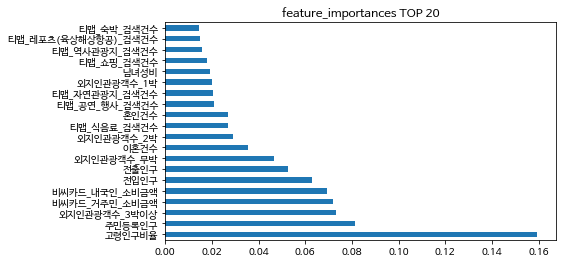

In [134]:
import matplotlib.pyplot as plt
# from matplotlib import font_manager, rc
# font_path = "C:/Windows/Fonts/NGULIM.TTF"
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)
plt.figure(figsize=(7,4))
feat_importances = pd.Series(model2.feature_importances_, index=x_test.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('feature_importances TOP 20')

In [135]:
feat_importances.nlargest(20)

고령인구비율                 0.159388
주민등록인구                 0.081260
외지인관광객수_3박이상           0.073169
비씨카드_거주민_소비금액          0.072027
비씨카드_내국인_소비금액          0.069158
전입인구                   0.062762
전출인구                   0.052770
외지인관광객수_무박             0.046729
이혼건수                   0.035554
외지인관광객수_2박             0.029115
티맵_식음료_검색건수            0.026828
혼인건수                   0.026816
티맵_공연_행사_검색건수          0.020930
티맵_자연관광지_검색건수          0.020685
외지인관광객수_1박             0.020194
남녀성비                   0.019221
티맵_쇼핑_검색건수             0.018101
티맵_역사관광지_검색건수          0.015599
티맵_레포츠(육상해상항공)_검색건수    0.014702
티맵_숙박_검색건수             0.014525
dtype: float64